In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
cat_vars = train[[ 'Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
num_vars = train[['Age', 'SibSp', 'Parch', 'Fare']]

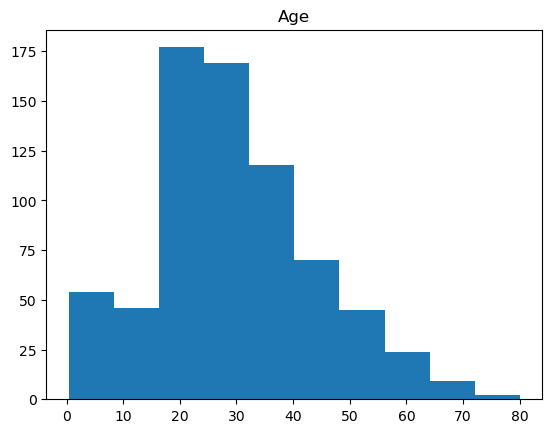

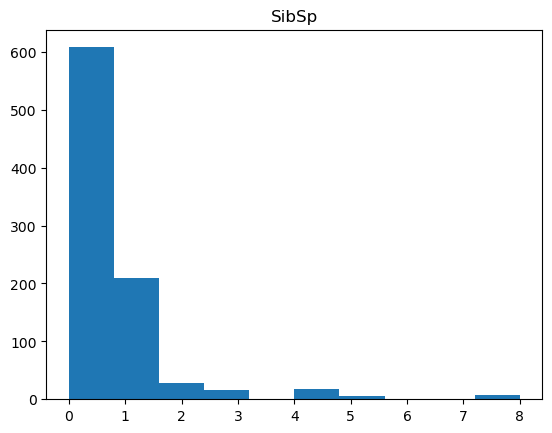

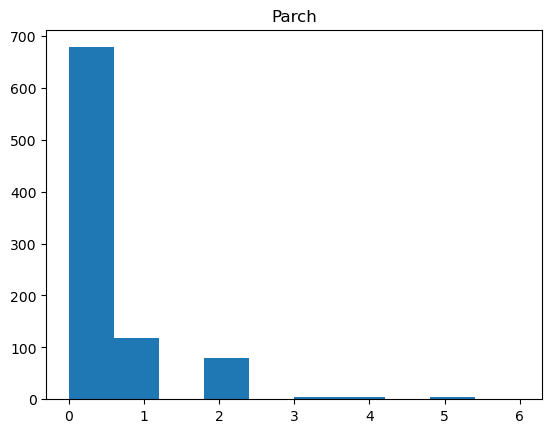

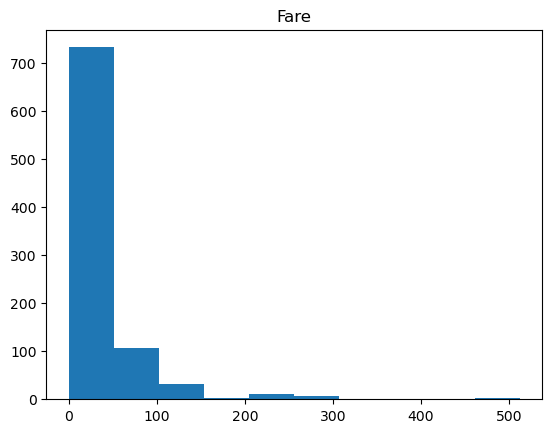

In [6]:
import matplotlib.pyplot as plt
for i in num_vars.columns:
    plt.hist(num_vars[i])
    plt.title(i)
    plt.show()

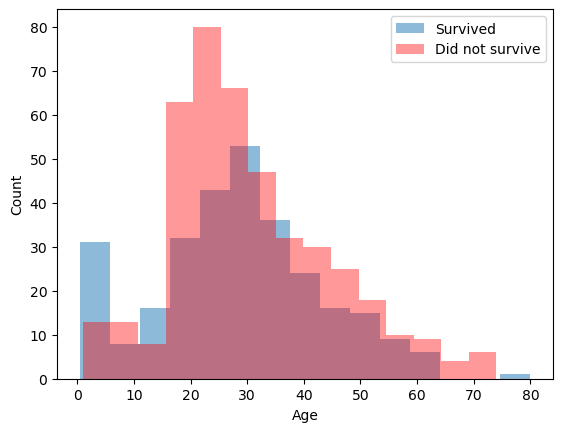

In [7]:
fig, ax = plt.subplots()

ax.hist(train[train["Survived"]==1]['Age'], label='Survived', alpha=0.5, bins=15)
ax.hist(train[train["Survived"]==0]['Age'], label='Did not survive', alpha=0.4, bins=15,color='red')

ax.set_xlabel('Age')
ax.set_ylabel('Count')

ax.legend()

In [8]:
pd.pivot_table(train, index='Survived', values=['Age', 'Fare', 'Parch', 'SibSp'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


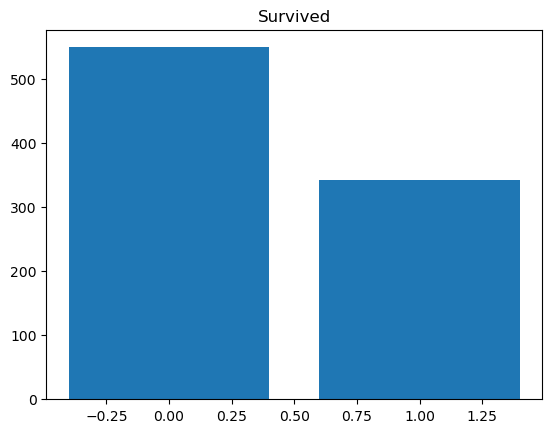

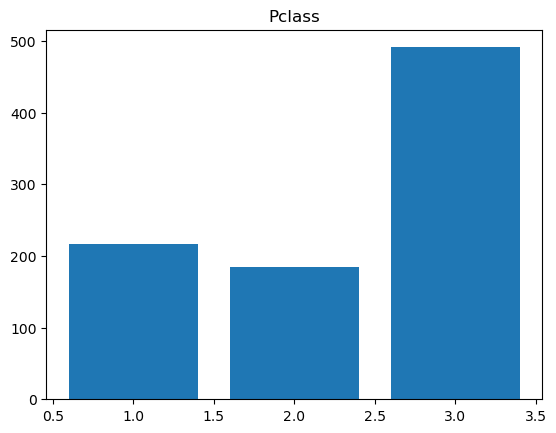

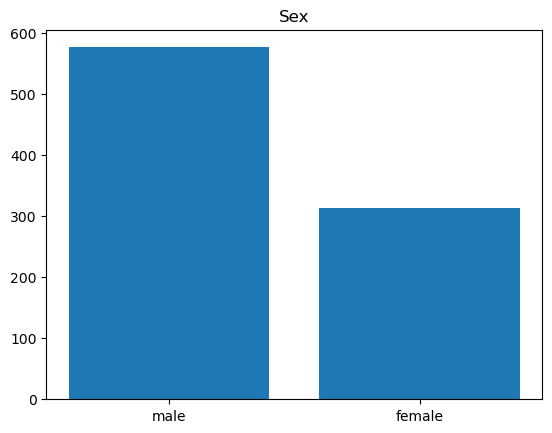

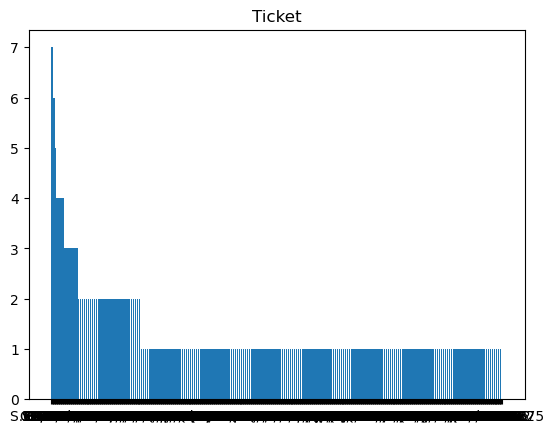

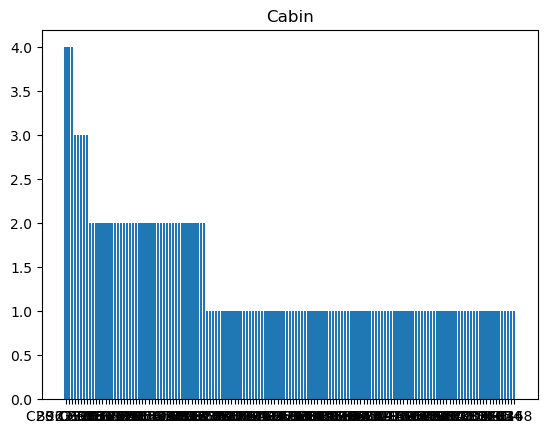

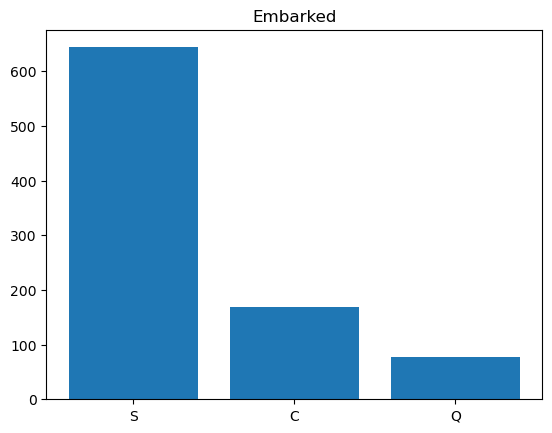

In [9]:
import seaborn as sns
for i in cat_vars.columns:
    plt.bar(cat_vars[i].value_counts().index,cat_vars[i].value_counts())
    plt.title(i)
    plt.show()

In [10]:
counts_mf = train.groupby(["Sex", "Survived"])["Name"].count().unstack()

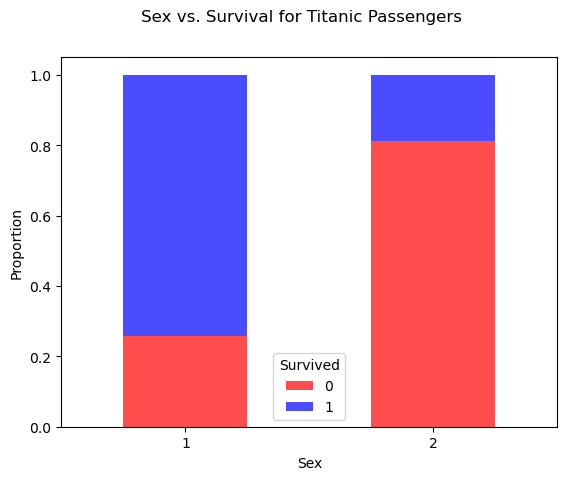

In [11]:
survived_percents_df = counts_mf.T.div(counts_mf.T.sum()).T

fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, alpha=0.7)

ax.set_xlabel("Sex")
ax.set_xticklabels([1, 2], rotation=0)
ax.set_ylabel("Proportion")


fig.suptitle("Sex vs. Survival for Titanic Passengers");

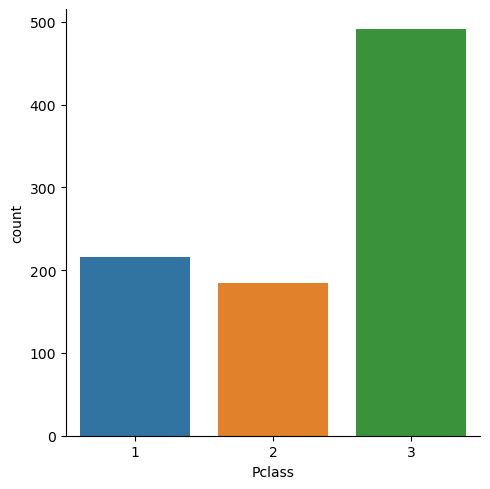

In [12]:
sns.catplot(x='Pclass', data=train, kind='count')

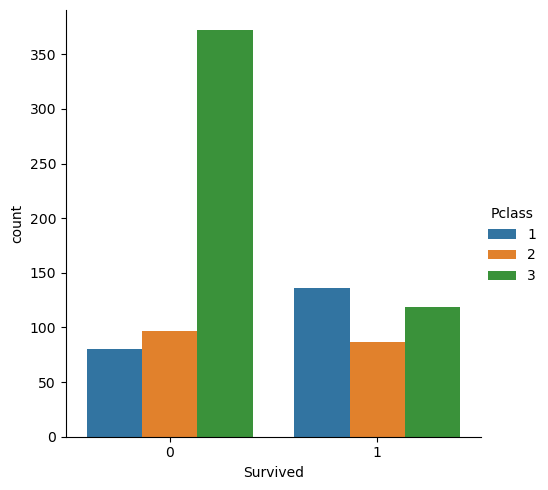

In [13]:
fig, ax = plt.subplots()

sns.catplot(x="Survived", hue="Pclass", data=train, kind='count')
plt.close(1) # catplot creates an extra figure we don't need


In [14]:
counts_cf = train.groupby(["Pclass", "Survived"])["Name"].count().unstack()

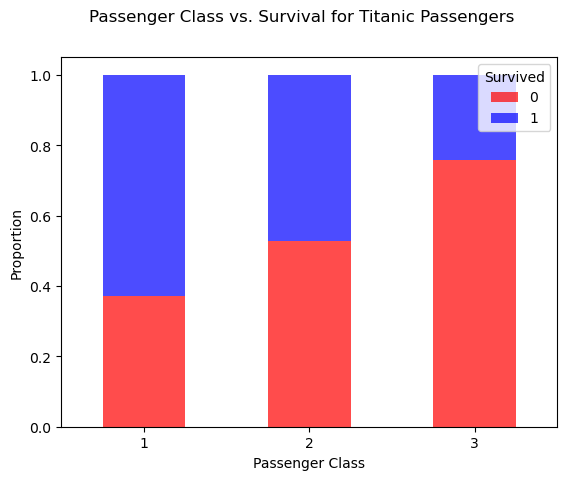

In [15]:
survived_percents_df = counts_cf.T.div(counts_cf.T.sum()).T

fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, alpha=0.7)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")


fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

In [16]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
train['Male'] = [1 if x =='male' else 0 for x in train['Sex']]
train['Female'] = [1 if x=='female' else 0 for x in train['Sex']]

train = train.drop('Sex', axis=1)
train 

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,0


In [18]:
train = train.dropna(subset=['Embarked'])

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
 11  Male         889 non-null    int64  
 12  Female       889 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 97.2+ KB


In [20]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
print(train.cabin_adv.value_counts())

n    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
counts_cf = train.groupby(["cabin_adv", "Survived"])["Name"].count().unstack()

cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  33.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


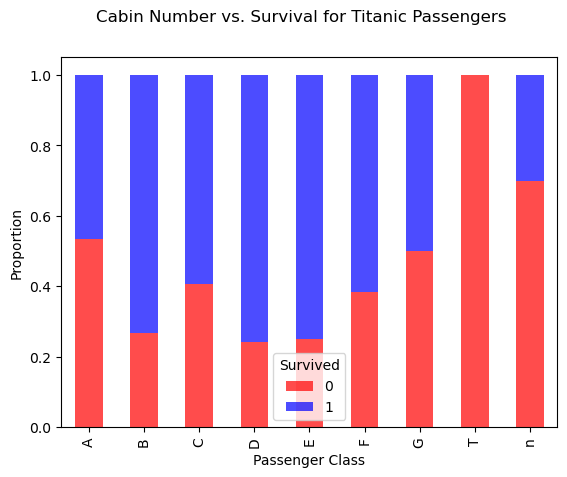

In [22]:
survived_percents_df = counts_cf.T.div(counts_cf.T.sum()).T

fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["red", "blue"], ax=ax, alpha=0.7)

ax.set_xlabel("Passenger Class")
#ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")


fig.suptitle("Cabin Number vs. Survival for Titanic Passengers");
print(pd.pivot_table(train,index='Survived', columns='cabin_adv', values='Name', aggfunc='count'))

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
 11  Male         889 non-null    int64  
 12  Female       889 non-null    int64  
 13  cabin_adv    889 non-null    object 
dtypes: float64(2), int64(7), object(5)
memory usage: 104.2+ KB


In [24]:
mData = train.drop(['Name', 'Cabin', 'PassengerId'], axis=1)
mData.head(7)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female,cabin_adv
0,0,3,22.0,1,0,A/5 21171,7.2500,S,1,0,n
1,1,1,38.0,1,0,PC 17599,71.2833,C,0,1,C
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,n
3,1,1,35.0,1,0,113803,53.1000,S,0,1,C
4,0,3,35.0,0,0,373450,8.0500,S,1,0,n
5,0,3,NaN,0,0,330877,8.4583,Q,1,0,n
6,0,1,54.0,0,0,17463,51.8625,S,1,0,E


In [25]:
mData['Age'] = mData.Age.fillna(mData.Age.mean())
mData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   Pclass     889 non-null    int64  
 2   Age        889 non-null    float64
 3   SibSp      889 non-null    int64  
 4   Parch      889 non-null    int64  
 5   Ticket     889 non-null    object 
 6   Fare       889 non-null    float64
 7   Embarked   889 non-null    object 
 8   Male       889 non-null    int64  
 9   Female     889 non-null    int64  
 10  cabin_adv  889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


In [26]:
mData.head(7)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female,cabin_adv
0,0,3,22.000000,1,0,A/5 21171,7.2500,S,1,0,n
1,1,1,38.000000,1,0,PC 17599,71.2833,C,0,1,C
2,1,3,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,n
3,1,1,35.000000,1,0,113803,53.1000,S,0,1,C
4,0,3,35.000000,0,0,373450,8.0500,S,1,0,n
5,0,3,29.642093,0,0,330877,8.4583,Q,1,0,n
6,0,1,54.000000,0,0,17463,51.8625,S,1,0,E


In [27]:
mData['emb_s'] = [1 if x =='S' else 0 for x in mData['Embarked']]
mData['emb_c'] = [1 if x =='C' else 0 for x in mData['Embarked']]
mData['emb_q'] = [1 if x =='Q' else 0 for x in mData['Embarked']]

mData

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female,cabin_adv,emb_s,emb_c,emb_q
0,0,3,22.000000,1,0,A/5 21171,7.2500,S,1,0,n,1,0,0
1,1,1,38.000000,1,0,PC 17599,71.2833,C,0,1,C,0,1,0
2,1,3,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,n,1,0,0
3,1,1,35.000000,1,0,113803,53.1000,S,0,1,C,1,0,0
4,0,3,35.000000,0,0,373450,8.0500,S,1,0,n,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,211536,13.0000,S,1,0,n,1,0,0
887,1,1,19.000000,0,0,112053,30.0000,S,0,1,B,1,0,0
888,0,3,29.642093,1,2,W./C. 6607,23.4500,S,0,1,n,1,0,0
889,1,1,26.000000,0,0,111369,30.0000,C,1,0,C,0,1,0


In [28]:
mData = mData.drop(['Embarked', 'Ticket'], axis=1)
mData

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female,cabin_adv,emb_s,emb_c,emb_q
0,0,3,22.000000,1,0,7.2500,1,0,n,1,0,0
1,1,1,38.000000,1,0,71.2833,0,1,C,0,1,0
2,1,3,26.000000,0,0,7.9250,0,1,n,1,0,0
3,1,1,35.000000,1,0,53.1000,0,1,C,1,0,0
4,0,3,35.000000,0,0,8.0500,1,0,n,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,n,1,0,0
887,1,1,19.000000,0,0,30.0000,0,1,B,1,0,0
888,0,3,29.642093,1,2,23.4500,0,1,n,1,0,0
889,1,1,26.000000,0,0,30.0000,1,0,C,0,1,0


<AxesSubplot:>

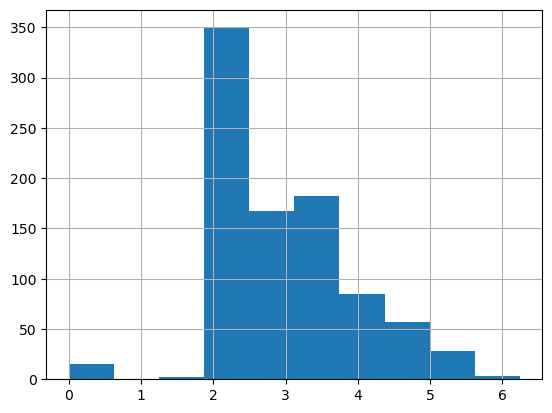

In [29]:
mData['Fare'] = np.log(mData.Fare+1)
mData['Fare'].hist()

In [30]:
mData['cab_A'] = [1 if x =='A' else 0 for x in mData['cabin_adv']]
mData['cab_B'] = [1 if x =='B' else 0 for x in mData['cabin_adv']]
mData['cab_C'] = [1 if x =='C' else 0 for x in mData['cabin_adv']]
mData['cab_D'] = [1 if x =='D' else 0 for x in mData['cabin_adv']]
mData['cab_E'] = [1 if x =='E' else 0 for x in mData['cabin_adv']]
mData['cab_F'] = [1 if x =='F' else 0 for x in mData['cabin_adv']]
mData['cab_G'] = [1 if x =='G' else 0 for x in mData['cabin_adv']]
mData['cab_T'] = [1 if x =='H' else 0 for x in mData['cabin_adv']]
mData['cab_n'] = [1 if x =='n' else 0 for x in mData['cabin_adv']]

mData

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female,cabin_adv,emb_s,...,emb_q,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_n
0,0,3,22.000000,1,0,2.110213,1,0,n,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.000000,1,0,4.280593,0,1,C,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.000000,0,0,2.188856,0,1,n,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.000000,1,0,3.990834,0,1,C,1,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.000000,0,0,2.202765,1,0,n,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,2.639057,1,0,n,1,...,0,0,0,0,0,0,0,0,0,1
887,1,1,19.000000,0,0,3.433987,0,1,B,1,...,0,0,1,0,0,0,0,0,0,0
888,0,3,29.642093,1,2,3.196630,0,1,n,1,...,0,0,0,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,3.433987,1,0,C,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
mData = mData.drop(['cabin_adv'], axis=1)
mData

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female,emb_s,emb_c,emb_q,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_n
0,0,3,22.000000,1,0,2.110213,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,1,38.000000,1,0,4.280593,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,1,3,26.000000,0,0,2.188856,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,1,1,35.000000,1,0,3.990834,0,1,1,0,0,0,0,1,0,0,0,0,0,0
4,0,3,35.000000,0,0,2.202765,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,2.639057,1,0,1,0,0,0,0,0,0,0,0,0,0,1
887,1,1,19.000000,0,0,3.433987,0,1,1,0,0,0,1,0,0,0,0,0,0,0
888,0,3,29.642093,1,2,3.196630,0,1,1,0,0,0,0,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,3.433987,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [32]:
X = mData.drop('Survived', axis=1)
X

,Pclass,Age,SibSp,Parch,Fare,Male,Female,emb_s,emb_c,emb_q,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_T,cab_n
0,3,22.000000,1,0,2.110213,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,38.000000,1,0,4.280593,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,26.000000,0,0,2.188856,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,1,35.000000,1,0,3.990834,0,1,1,0,0,0,0,1,0,0,0,0,0,0
4,3,35.000000,0,0,2.202765,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,2.639057,1,0,1,0,0,0,0,0,0,0,0,0,0,1
887,1,19.000000,0,0,3.433987,0,1,1,0,0,0,1,0,0,0,0,0,0,0
888,3,29.642093,1,2,3.196630,0,1,1,0,0,0,0,0,0,0,0,0,0,1
889,1,26.000000,0,0,3.433987,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [33]:
Y = mData['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05)
xgb.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
       )

[0]	validation_0-rmse:0.48803
[1]	validation_0-rmse:0.47702
[2]	validation_0-rmse:0.46734
[3]	validation_0-rmse:0.45842
[4]	validation_0-rmse:0.45030
[5]	validation_0-rmse:0.44254
[6]	validation_0-rmse:0.43592
[7]	validation_0-rmse:0.42948
[8]	validation_0-rmse:0.42326
[9]	validation_0-rmse:0.41785
[10]	validation_0-rmse:0.41271
[11]	validation_0-rmse:0.40824
[12]	validation_0-rmse:0.40393
[13]	validation_0-rmse:0.39994
[14]	validation_0-rmse:0.39654
[15]	validation_0-rmse:0.39353
[16]	validation_0-rmse:0.39117
[17]	validation_0-rmse:0.38892
[18]	validation_0-rmse:0.38689
[19]	validation_0-rmse:0.38516


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[20]	validation_0-rmse:0.38334
[21]	validation_0-rmse:0.38270
[22]	validation_0-rmse:0.38190
[23]	validation_0-rmse:0.38166
[24]	validation_0-rmse:0.37996
[25]	validation_0-rmse:0.37985
[26]	validation_0-rmse:0.37940
[27]	validation_0-rmse:0.37939
[28]	validation_0-rmse:0.37933
[29]	validation_0-rmse:0.37826
[30]	validation_0-rmse:0.37837
[31]	validation_0-rmse:0.37836
[32]	validation_0-rmse:0.37884
[33]	validation_0-rmse:0.37921


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
y_pred = xgb.predict(X_test)
predicted = []
for num in y_pred:
    if num > 0.5:
        predicted.append(1)
    else:
        predicted.append(0)


In [37]:
# Evaluate the model's performance on the testing data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, predicted))
print("Precision: ", precision_score(y_test, predicted))
print("Recall: ", recall_score(y_test, predicted))
print("F1 Score: ", f1_score(y_test, predicted))

Accuracy:  0.797752808988764
Precision:  0.7538461538461538
Recall:  0.7101449275362319
F1 Score:  0.7313432835820897


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the testing data using the trained model
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model's performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.7808988764044944
Precision:  0.7027027027027027
Recall:  0.7536231884057971
F1 Score:  0.7272727272727273
